In [5]:
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader.yahoo.headers import DEFAULT_HEADERS
import datetime as dt
import requests_cache   
import matplotlib.pyplot as plt

### Yahoo Finance API using pandas datareader has been broken - use yfinance as alternative

See [yfinancesimple.ipynb](yfinancesimple.ipynb) for a working sample of the same code below using yfinance library

In [2]:
expire_after = dt.timedelta(days=3)
session = requests_cache.CachedSession(cache_name='cache',backend='sqlite',expire_after=expire_after)
session.headers = DEFAULT_HEADERS

In [3]:
start =  dt.datetime(2012,1,1)
#ticker = 'MSFT'
ticker = '^GSPC' #S&P 500 data

In [4]:
df = web.DataReader(ticker,'yahoo',start=start,session=session)
df.tail()

AttributeError: 'NoneType' object has no attribute 'group'

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2628 entries, 2012-01-03 to 2022-06-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2628 non-null   float64
 1   Low        2628 non-null   float64
 2   Open       2628 non-null   float64
 3   Close      2628 non-null   float64
 4   Volume     2628 non-null   float64
 5   Adj Close  2628 non-null   float64
dtypes: float64(6)
memory usage: 143.7 KB


In [25]:
df = df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [26]:
df['simple_ret'] = df.adj_close.pct_change()

[Text(0, 0.5, 'Simple returns (%)')]

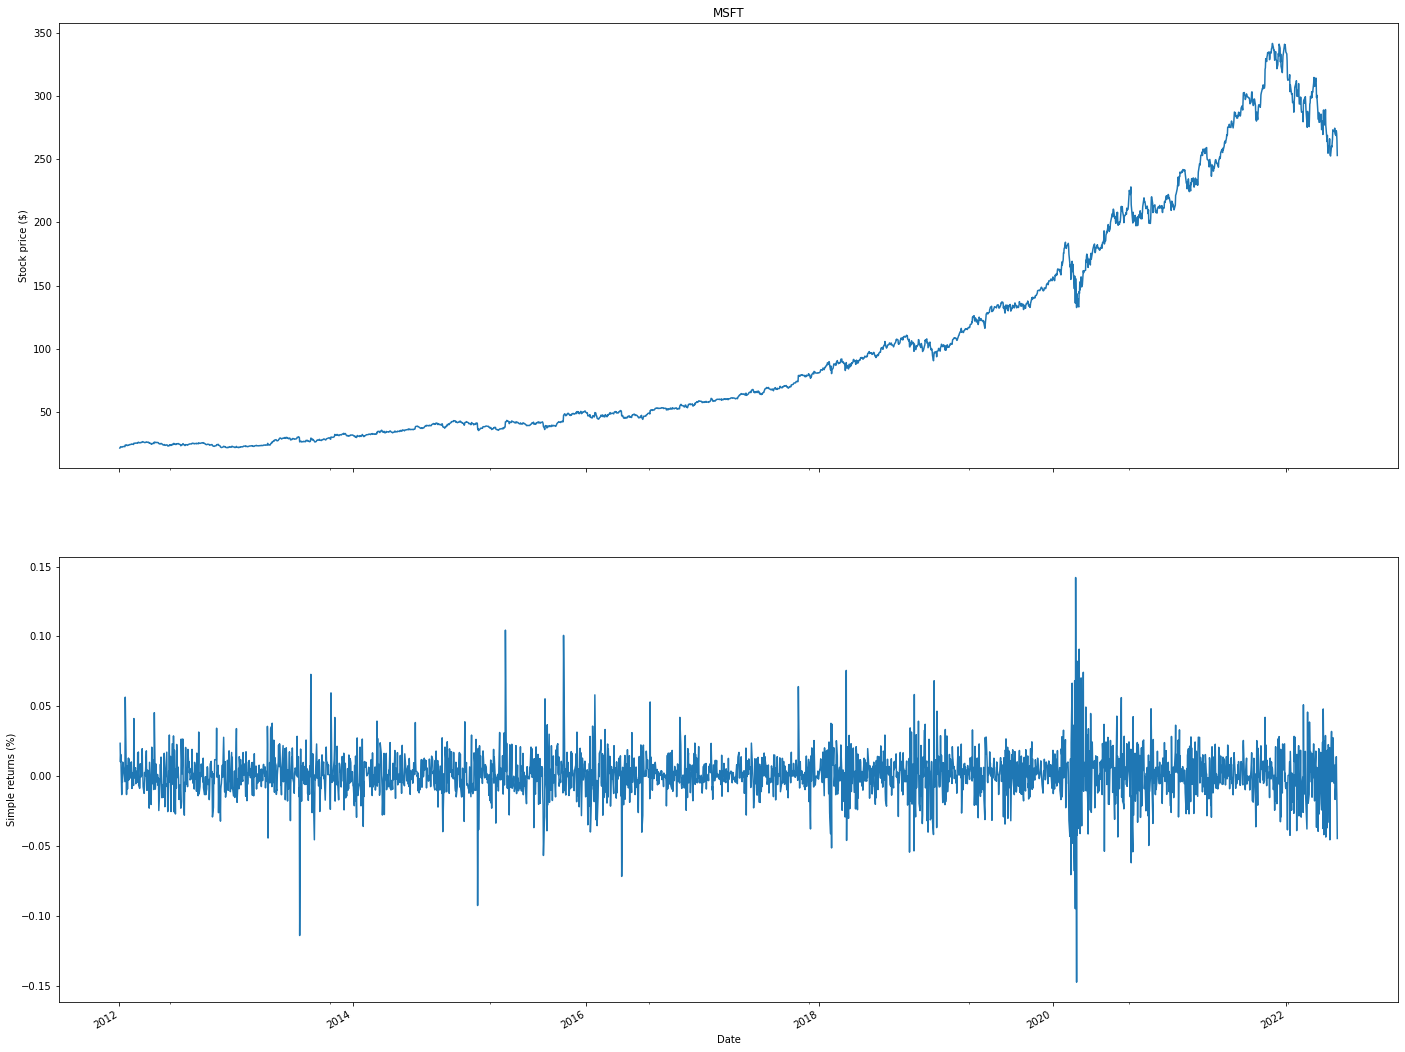

In [27]:
fig,ax = plt.subplots(2,1, figsize=(24,20),sharex=True)
df.adj_close.plot(ax=ax[0])
ax[0].set(title='MSFT',ylabel='Stock price ($)')

df.simple_ret.plot(ax=ax[1])
ax[1].set(ylabel='Simple returns (%)')

In [28]:
actions = web.DataReader(ticker,'yahoo-actions',start=start)
actions.head()

,action,value
2022-05-18,DIVIDEND,0.62
2022-02-16,DIVIDEND,0.62
2021-11-17,DIVIDEND,0.62
2021-08-18,DIVIDEND,0.56
2021-05-19,DIVIDEND,0.56


In [29]:
dividends = web.DataReader(ticker,'yahoo-dividends',start=start)
dividends.head()

,action,value
2022-05-18,DIVIDEND,0.62
2022-02-16,DIVIDEND,0.62
2021-11-17,DIVIDEND,0.62
2021-08-18,DIVIDEND,0.56
2021-05-19,DIVIDEND,0.56
